# _Clustering_

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Visualización tridimensional
import sklearn.cluster # Algoritmos de clustering
import sklearn.preprocessing

El clustering o agrupamiento es la tarea de agrupar una serie de objetos de una manera que objetos del mismo grupo (cluster) son más similares entre sí que con los de otros grupos. Su objetivo principal es en la fase exploratoria de los datos y se clasifica dentro de los métodos no supervisados de aprendizaje de máquinas.

Utilizaremos un conjunto de datos de clientes de un centro comercial e intentaremos segmentarlos utilizando un método de clustering.

In [2]:
data = pd.read_csv("data/customers.csv",sep=";")

Cada cliente está definido por su edad, su ingreso anual y un índice de gasto dentro del centro comercial.

In [3]:
data.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Verificamos que las características se encuentran en distintos rangos, por lo que tendremos que hacer un escalamiento de las características.

In [4]:
data.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Preprocesamiento

Para realizar el reescalamiento del conjunto de datos utilizaremos un Min-max Scaler.

In [19]:
scaler = sklearn.preprocessing.MinMaxScaler()
data_scaled = pd.DataFrame(
    scaler.fit_transform(data),
    columns = data.columns
)

In [20]:
data_scaled.head()

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


Ahora todas las características se encuentran entre 0 y 1.

In [7]:
data_scaled.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,0.400962,0.373443,0.502041
std,0.268635,0.215285,0.263505
min,0.000000,0.000000,0.000000
25%,0.206731,0.217213,0.344388
50%,0.346154,0.381148,0.500000
75%,0.596154,0.516393,0.734694
max,1.000000,1.000000,1.000000


Al explorar visualmente el conjunto de datos podemos observar que intuitivamente existe una separación de grupos de clientes.

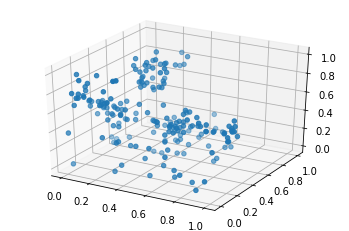

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(
    data_scaled.age,
    data_scaled.annual_income,
    data_scaled.spending_score
)
plt.show()

## Modelamiento

Procedemos a ajustar u modelo de K-Means para poder agrupar automáticamente nuestro conjunto de datos. Antes de poder ajustar el modelo debemos seleccionar la cantidad de grupos que deseamos ajustar. Comenzaremos con ajustar un modelo de 2 centroides.

In [22]:
km = sklearn.cluster.KMeans(2) # Instanciamos el algoritmo de k-means para ajustar un modelo de 2 grupos.
km.fit(data_scaled) # Ajustamos el modelo

KMeans(n_clusters=2)

Se observa en el gráfico de dispersión que quizá no es la cantidad adecuada de grupos a ajustar.

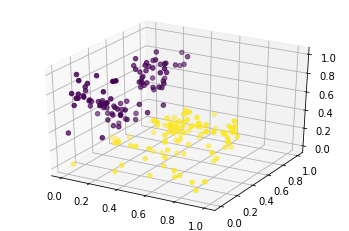

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(
    data_scaled.age, # Vamos a graficar la edad del cliente en el eje x
    data_scaled.annual_income, # EL ingreso anual en el eje y
    data_scaled.spending_score, # El puntaje de gasto en el eje z
    c = km.labels_ # Pintamos cada uno de los clientes con el grupo asignado por k means
)
plt.show()

Para detectar el número óptimo de grupos a ajustar con los métodos de clustering utilizaremos el "método del codo" en donde graficamos en el eje x la cantidad de grupos del modelo y en el eje x la distancia promedio de cada punto con el centroide del grupo. En sklearn esta métrica se encuentra almacenada en el atributo inertia_.

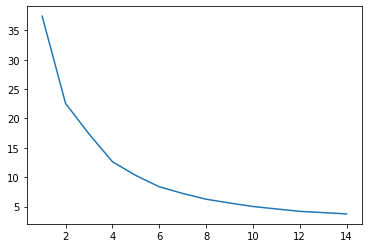

In [28]:
inertias = [] # Almacenaremos cada una de las inercias en esta lista
n_clusters = range(1,15) # Ajustaremos modelos de 1 a 14 grupos
for n in n_clusters: # Iteraremos por cada uno de las cantidades de grupos seleccionadas
    km = sklearn.cluster.KMeans(n) # Instanciaremos cada modelo con su respectiva cantidad de grupos
    km.fit(data_scaled) # Ajustaremos cada uno de los modelos
    inertias.append(km.inertia_) # Guardamos cada inercia en una lista
plt.plot( # Graficamos la cantidad de grupos versus la inercia
    n_clusters,
    inertias
)
plt.show()

Con la anterior visualizacion podemos concluir que un buen número de grupos se encuentra cerca del número 4.

Ajustamos un modelo de k means con 4 grupos.

In [17]:
km = sklearn.cluster.KMeans(4)
km.fit(data_scaled)

KMeans(n_clusters=4)

Existe un mejor agrupamiento al utilizar 4 grupos.

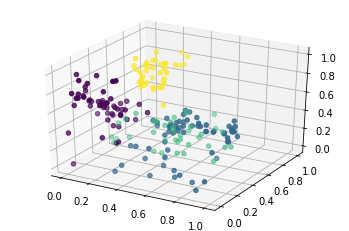

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(
    data_scaled.age,
    data_scaled.annual_income,
    data_scaled.spending_score,
    c = km.labels_
)
plt.show()